In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tricky
import scipy as sp
import pandas as pd

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


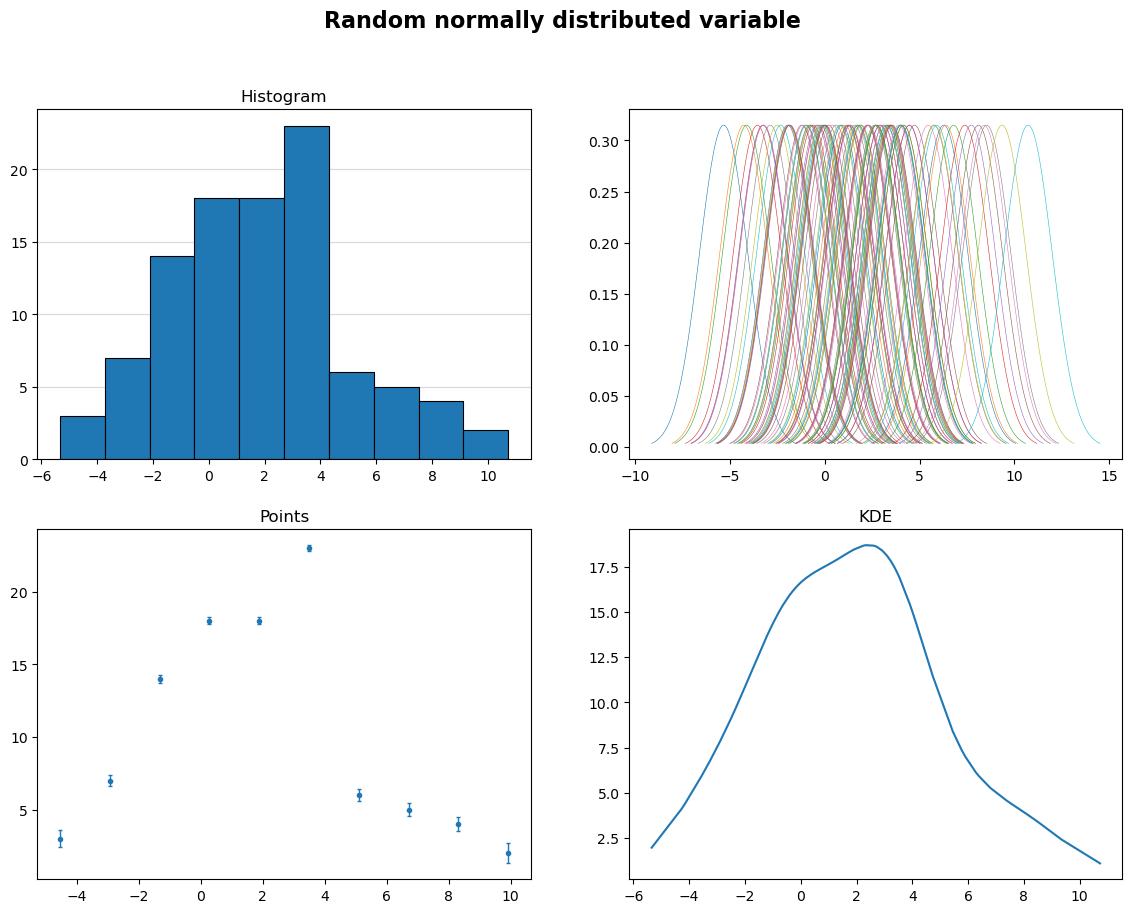

In [8]:
# Initialize figure and Axes, needed because we want to generate the hist and use its output...
fig, axs = plt.subplots(2, 2, figsize=(14,10))


# Define random variable (notice that it's sorted only for GUS plotting porpuses, but hist doesn't care about that)
x = sorted(np.random.normal(loc=2, scale=3, size=100))  # Size = N, loc = mean, scale = std


# Generate hist
counts, bins, c = axs[0,0].hist(x, bins=10, edgecolor='k', linewidth=0.8, visible=1, zorder=2)  # Random rule I found: 
# bins should be sqrt(N)


# Generate hist as points with errorbar (I try to plot everything in one section later, because it's qt)
ey = counts
ex = (bins[:-1] + bins[1:])/2

# Small gaussians centered on data points
std = 1.06 * 3 * 100 ** (-0.2)
gus = [sp.stats.norm(loc=i, scale=std) for i in x]
ygus = gus[0].pdf(np.linspace(gus[0].mean() - 3 * std, gus[0].mean() + 3 * std, 100))  # it used to be set for each gus in the 
# cycle below, but they are all the same
for i in gus:
    xgus = np.linspace(i.mean() - 3 * std, i.mean() + 3 * std, 100)  # Plot between [-3sig, +3sig]
    axs[0,1].plot(xgus, ygus, lw=0.4)


# Generate chad Gaussian
yGUS = [np.sum([i.pdf(p) for i in gus]) for p in x]  # For each x point called p sum each small gus's x_p value


# Defining norms and renormalize final gaussian
norm = sp.integrate.trapezoid(x=ex, y=ey)
norm2 = sp.integrate.trapezoid(x=x, y=yGUS)

yGUS = yGUS / norm2 * norm  # Renormalized gaussian... We could try Carrot method of summing y(x) points to calculate norm


# Plot
fig.suptitle('Random normally distributed variable', fontsize=16, weight='bold')  # weight goes up to 1000, and regulates the 
# boldness. The jump betweem 549 and 550 is ridiculous, possibly there are less than 1000 values set for each font


axs[0,0].set_title('Histogram')
# axs[0,0].set_yticks(range(0, 40, 5)) this works, but it isn't a clear shot: if the plot exceeds the ticks' range wtf happens?
axs[0,0].yaxis.set_major_locator(tricky.MultipleLocator(5))  # What a wonderful function (from matplotlib.ticker)
axs[0,0].grid(axis='y', alpha=0.5, zorder=1)

axs[1,0].set_title('Points')
axs[1,0].errorbar(ex, ey, fmt='.', yerr=1/np.sqrt(counts), elinewidth=1, capsize=1.5)

axs[1,1].set_title('KDE')
axs[1,1].plot(x, yGUS, zorder=3)

# axs[1,1].axis('off') A way to kill an axes

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

### Notes
Probably the first point means to actually create 2 datasets for 2 variables... Or a single dataset containing data for both, otherwise nothing makes sense.

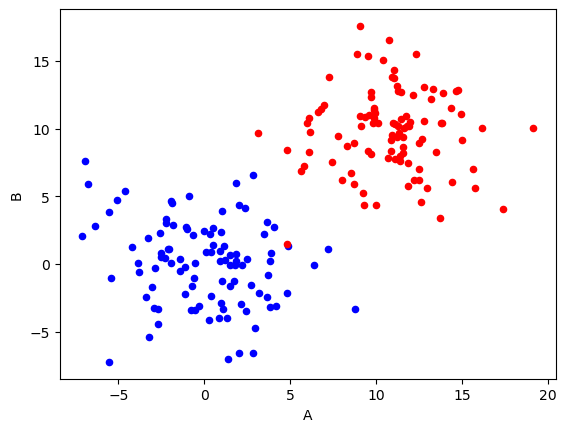

In [3]:
rng = np.random.default_rng()
def datagen(mean, std):
    A = rng.normal(loc=mean[0], scale=std[0], size=100)
    B = rng.normal(loc=mean[1], scale=std[1], size=100)
    return pd.DataFrame(data=np.array([A,B]).T, columns=['A', 'B'])
    
dat1, dat2 = datagen([0, 0],[3, 3]), datagen([10,10], [3,3])

fig, ax = plt.subplots()
dat1.plot.scatter('A', 'B', c='blue', ax=ax)
dat2.plot.scatter('A', 'B', c='red', ax=ax)
plt.show()

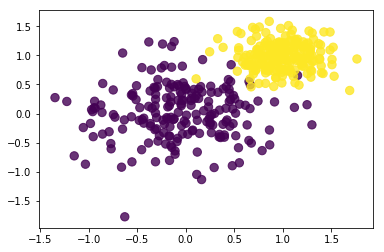

In [4]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot